In [31]:
import os
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import (
plot_class_regions_for_classifier_subplot)
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
os.chdir('C:\\Users\Lacey\Documents\School\Applied Machine Learning')

In [27]:
def ROC_curve(algModel,X,y,Xtest,ytest):
    from sklearn.metrics import roc_curve, auc
    alg_score = algModel.fit(X,y).predict(Xtest)
    fpr_alg, tpr_alg, _ = roc_curve(ytest, alg_score)
    roc_auc_alg = auc(fpr_alg, tpr_alg)

    plt.figure()
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.01])
    plt.plot(fpr_alg, tpr_alg, lw=3, label='alg ROC curve (area = {:0.2f})'.format(roc_auc_alg))
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
    plt.legend(loc='lower right', fontsize=13)
    plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
    plt.axes().set_aspect('equal')
    plt.show()

def evaluation(model, Xtest, ytest):
    classificationReport = classification_report(ytest, model.predict(Xtest), target_names=['Not 1', '1'])
    confusion = confusion_matrix(ytest, model.predict(Xtest))
    print(confusion)
    print(classificationReport)

In [67]:
#Importing data and creating training data and target
fraud = pd.read_csv("fraud_data.csv")
#target = fraud['Class']
#fraud = fraud.drop('Class', axis = 1)

In [68]:
#check for missing data, and then scale all data for modeling ##Do we need this on our data??
fraud.isnull().any() #there is no null data to correct
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
fraud[['Time','Amount']] = scaler.fit_transform(fraud[['Time','Amount']])
fraud 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.005824,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000105,0
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.014739,0
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.004807,0
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.002724,0
5,0.000012,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0.000143,0
6,0.000023,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,0.000194,0
7,0.000041,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.001588,0
8,0.000041,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.003628,0
9,0.000052,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,0.000143,0


In [69]:
#taking a subsample of the data since the set is so huge
sample = fraud.sample(n = 20000, random_state = 0)
sampleTarget = sample['Class']
sample = sample.drop('Class', axis = 1)

In [6]:
#Checking for how many faudulent cases there are in the dataset to know if there is class imbalance
count = 0
for i in sampleTarget:
    if i == 1:
        count += 1
print(count) 

40


In [70]:
#Initial train/test split, will reserve test set for final model testing after validation
X_train, X_test, y_train, y_test = train_test_split(sample, sampleTarget, train_size=.8,
                                                    test_size = .2, random_state = 0)

In [8]:
#Ensure there are fraud cases in sample
count = 0
for i in y_train:
    if i == 1:
        count += 1
print(count) 

31


In [113]:
#Running dummy classifier to create testing baseline for better models, there is significant class imbalance in this dataset
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_dummy_predictions = dummy_majority.predict(X_test)
dummy_majority.score(X_test, y_test)
1-dummy_majority.score(X_test, y_test)

0.0022499999999999742

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


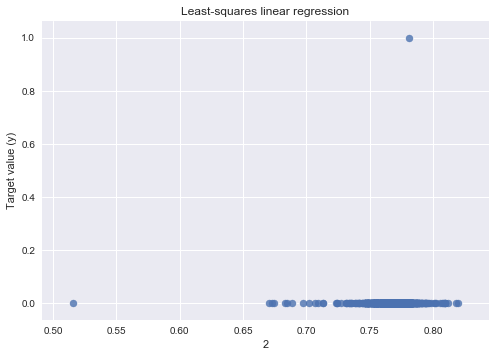

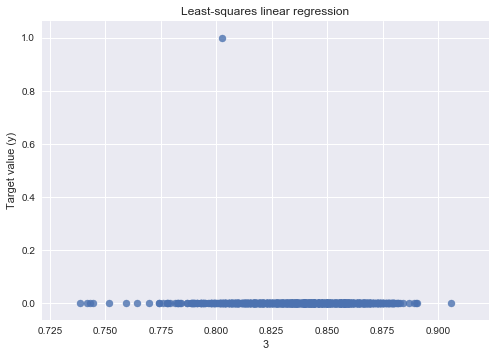

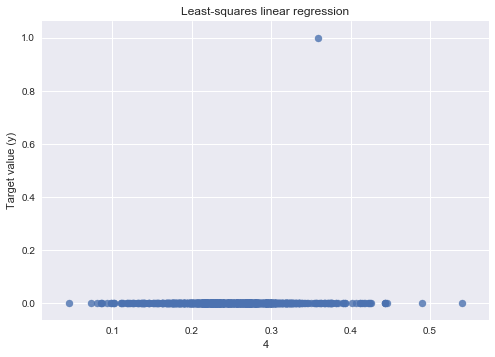

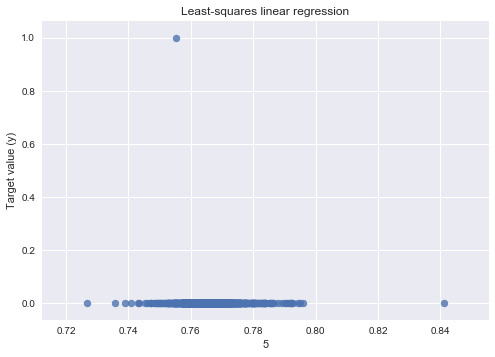

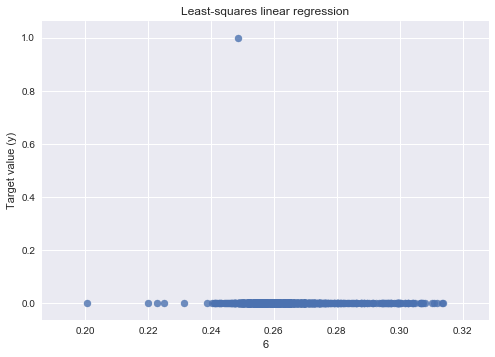

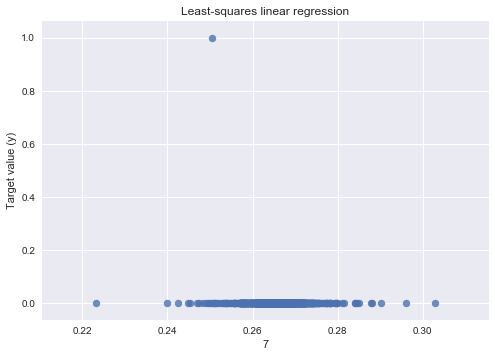

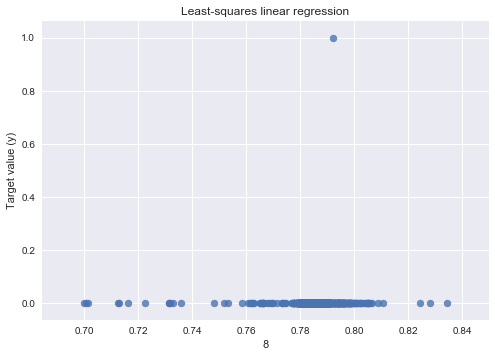

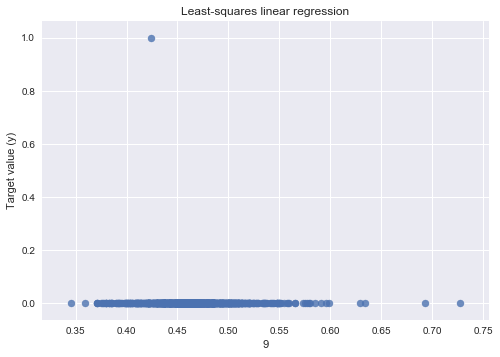

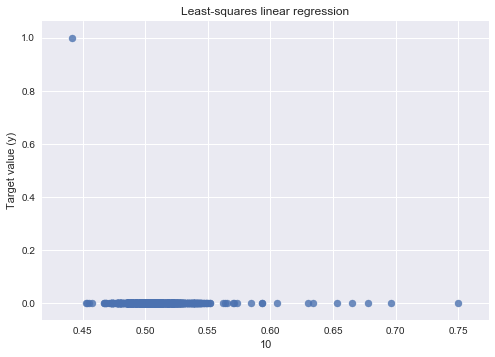

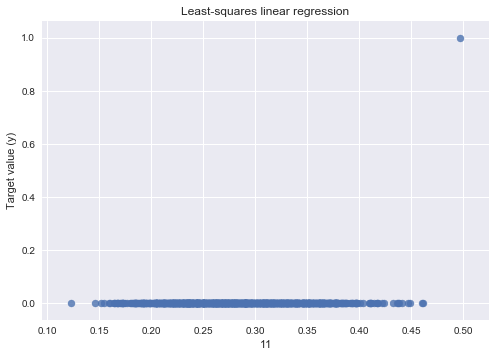

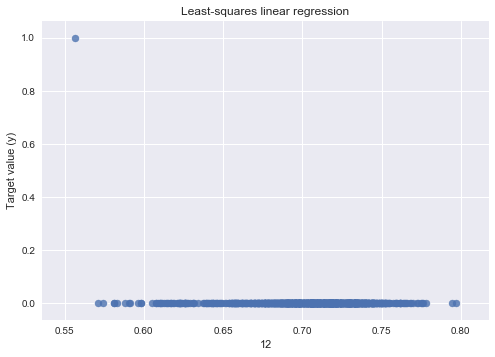

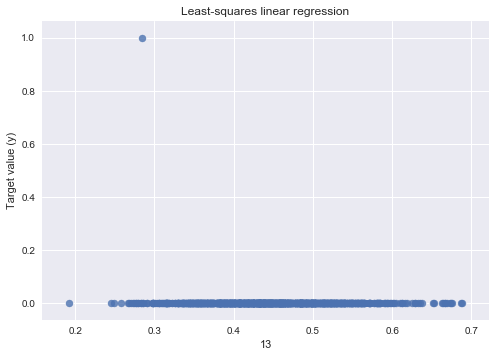

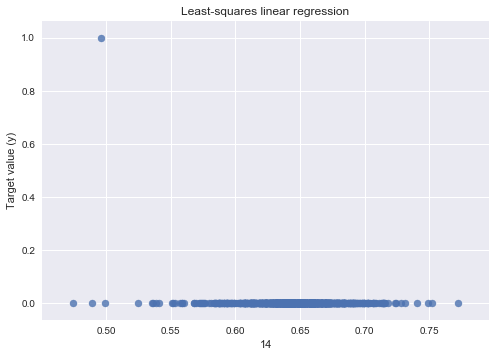

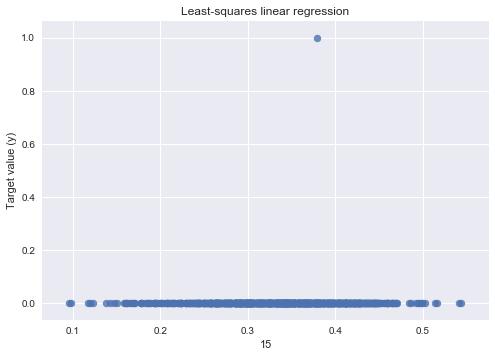

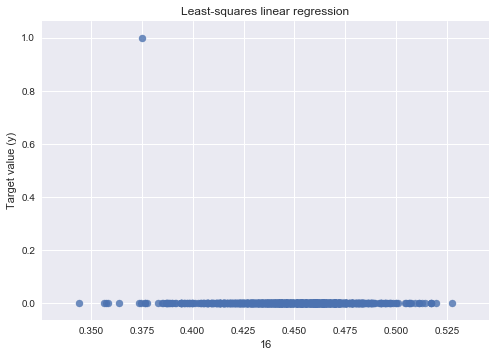

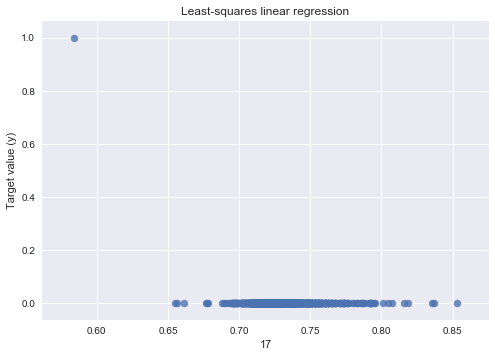

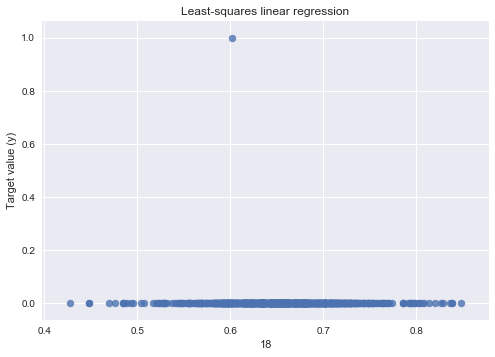

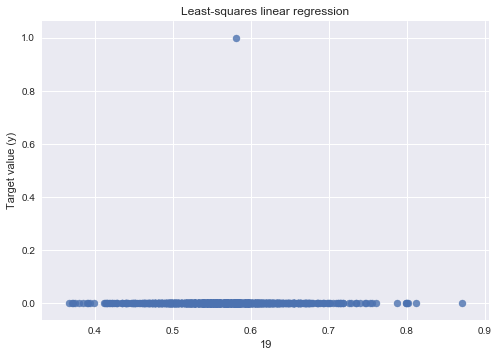

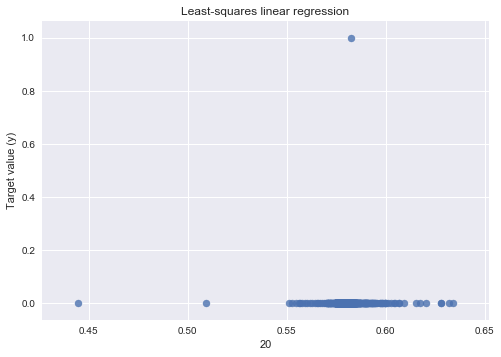

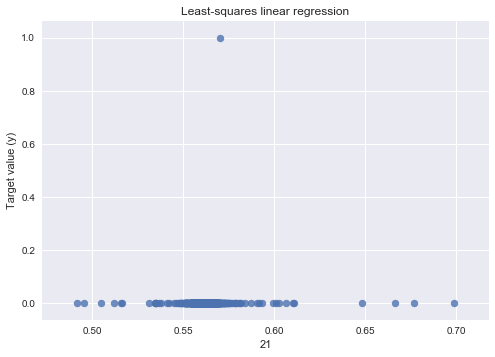

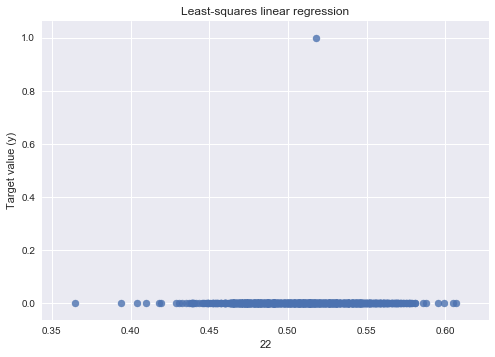

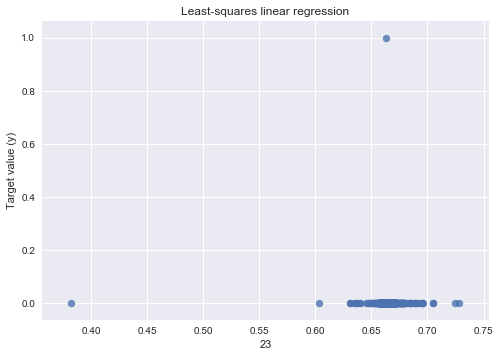

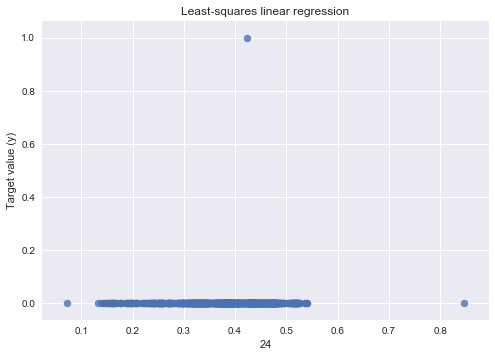

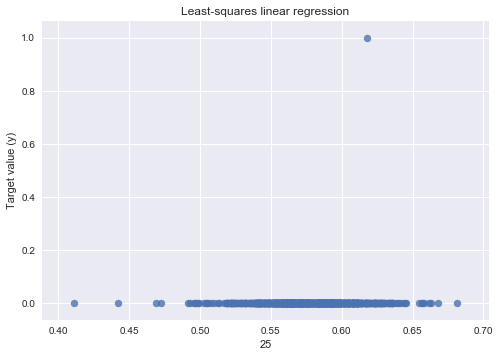

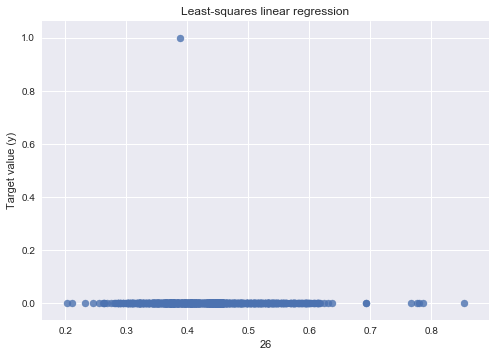

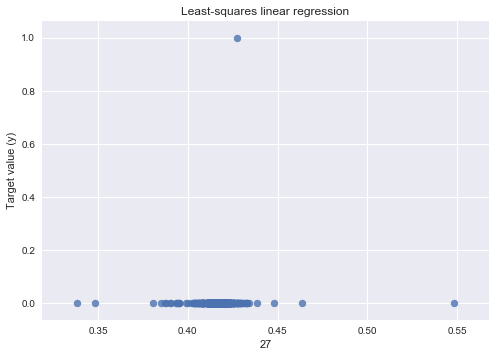

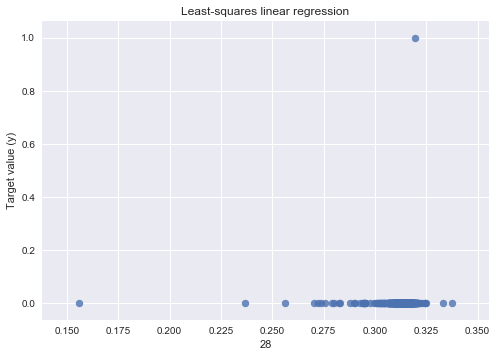

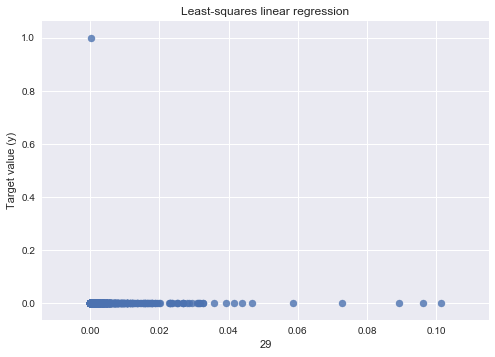

In [43]:
#data exploration, scatter plots 
d2 = fraud.sample(1000)
num = range(1,30,1)
for i in num:
    plt.scatter(d2[i], d2['Class'], marker= 'o', s=50, alpha=0.8)
    plt.title('Least-squares linear regression')
    plt.xlabel(d1.columns.values[i])
    plt.ylabel('Target value (y)')
    plt.show()

In [12]:
#first model: KNN classifier using grid search
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

k = [1,2,3,4,5,6,7,8,9,10]
parameters = {'n_neighbors': k}
evaluation = ['accuracy','precision','recall', 'f1','roc_auc']
for j in evaluation:
    clf = KNeighborsClassifier()
    grid_clf = GridSearchCV(clf, param_grid = parameters, scoring = j)
    grid_clf.fit(X_train, y_train)
    print('Grid best parameter (max. {0}): {1}'.format(j, grid_clf.best_params_))
    print('Grid best score ({0}): {1}'.format(j, grid_clf.best_score_))

Grid best parameter (max. accuracy): {'n_neighbors': 3}
Grid best score (accuracy): 0.99925
Grid best parameter (max. precision): {'n_neighbors': 8}
Grid best score (precision): 0.916671875
Grid best parameter (max. recall): {'n_neighbors': 3}
Grid best score (recall): 0.7030431818181818
Grid best parameter (max. f1): {'n_neighbors': 3}
Grid best score (f1): 0.7727042639066497
Grid best parameter (max. roc_auc): {'n_neighbors': 9}
Grid best score (roc_auc): 0.8998021634779603


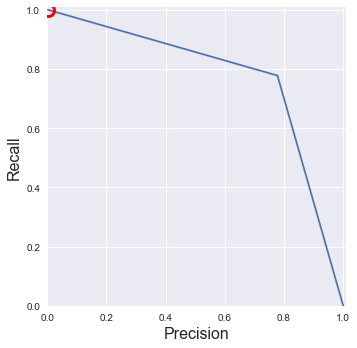

Confusion Matrix for KNN Classifier and Classification Report with best k-value of 3: 
[[3989    2]
 [   2    7]]
             precision    recall  f1-score   support

      Not 1       1.00      1.00      1.00      3991
          1       0.78      0.78      0.78         9

avg / total       1.00      1.00      1.00      4000



In [21]:
#KNN precision-recall curve, best k value is 3
from sklearn.metrics import roc_curve, auc

knn = KNeighborsClassifier(n_neighbors = 3)
knn_score = knn.fit(X_train, y_train).predict(X_test)
knn1 = KNeighborsClassifier(n_neighbors = 3).fit(X_train,y_train)

from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, knn_score)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

print("Confusion Matrix for KNN Classifier and Classification Report with best k-value of 3: ")
classificationReport = classification_report(y_test, knn1.predict(X_test), target_names=['Not 1', '1'])
confusion = confusion_matrix(y_test, knn1.predict(X_test))
print(confusion)
print(classificationReport)

In [64]:
#subsampling data randomly for computationally expensive algorithms: Run before SVC

sample = fraud.sample(n = 7000, random_state = 0)

count = 0
for i in sample['Class']:
    if i == 1:
        count += 1

probability = count/len(sample['Class'])
probability #probabity of fraud case is approximate in subsample to entire dataset

0.0015714285714285715

In [65]:
#Splitting data for models built with subsample
sampleTarget = sample['Class']
sample = sample.drop('Class', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(sample, sampleTarget, train_size=.8,
                                                    test_size = .2, random_state = 0)


In [10]:
count = 0
for i in y_train:
    if i == 1:
        count += 1
print(count) 

7


In [11]:
#Second model: SVC classifier using grid search, we care the most about recall because that tells us how often we are actually 
#detecting fraud out of actual fraud cases
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

kernels = ['linear', 'rbf']
parameters = {'C': [.0001,.001,.01,.1,10], 'gamma': [.0001,.001,.01,.1,10], 'kernel': kernels}
evaluation = ['accuracy','precision','recall', 'f1','roc_auc']

for j in evaluation:
    clf = SVC()
    grid_clf = GridSearchCV(clf, param_grid = parameters, scoring = j)
    grid_clf.fit(X_train, y_train)
    print('Grid best parameter (max. {0}): {1}'.format(j, grid_clf.best_params_))
    print('Grid best score ({0}): {1}'.format(j, grid_clf.best_score_))
#best parameters for SVC to predict recall are C = .1, gamma=.0001, kernel=linear

C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: U

C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: U

C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: U

Grid best parameter (max. precision): {'C': 0.01, 'gamma': 0.0001, 'kernel': 'linear'}
Grid best score (precision): 0.7776190476190475
Grid best parameter (max. recall): {'C': 0.1, 'gamma': 0.0001, 'kernel': 'linear'}
Grid best score (recall): 0.6110119047619047


C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: Undefined

C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: Undefined

C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: Undefined

Grid best parameter (max. f1): {'C': 0.1, 'gamma': 0.0001, 'kernel': 'linear'}
Grid best score (f1): 0.666547619047619
Grid best parameter (max. roc_auc): {'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}
Grid best score (roc_auc): 0.9808076671192474


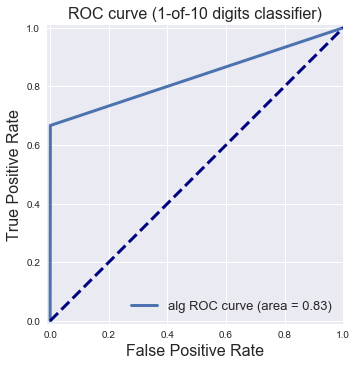

[[3988    3]
 [   3    6]]
             precision    recall  f1-score   support

      Not 1       1.00      1.00      1.00      3991
          1       0.67      0.67      0.67         9

avg / total       1.00      1.00      1.00      4000



In [72]:
#Evaluating final SVC model

supportVectorModel = SVC(C = .1, gamma = .0001, kernel ='linear')
ROC_curve(supportVectorModel, X_train, y_train, X_test, y_test)
#print(classification_report(y_test, supportVectorModel.predict(X_test), target_names=['Not Fraud', 'Fraud']))
evaluation(supportVectorModel, X_test, y_test)

In [65]:
#boosting with AdaBoost method on SVM classifier model

from sklearn.ensemble import AdaBoostClassifier

rDict = {}
pDict = {}
maxRecall = 0
maxPrecision = 0
estimator = range(1,500,10)
learnRate = [.01,.05,.1,.5,1]


for i,j in zip(estimator, learnRate):
    ada_SVC = AdaBoostClassifier(
   supportVectorModel, n_estimators= i,
    algorithm="SAMME", learning_rate= j, random_state=42)
    ada_SVC.fit(X_train, y_train)
    y_pred = ada_SVC.predict(X_test)
    dict1 = {str(i)+(',')+str(j): recall_score(y_test, y_pred)}
    dict2 = {str(i)+(',')+str(j): precision_score(y_test, y_pred)}
    rDict.update(dict1)
    pDict.update(dict2)
    if rDict[str(i)+(',')+str(j)] > maxRecall:
        maxRecall = rDict[str(i)+(',')+str(j)]
        if pDict[str(i)+(',')+str(j)] > maxPrecision:
            maxPrecision = pDict[str(i)+(',')+str(j)]
        for i in rDict:
            for j in pDict:
                if rDict[i] == maxRecall and pDict[j] == maxPrecision:
                    bestParam = i+(',')+j
print('Best Boosting Param: ', bestParam)   

C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Best Boosting Param:  41,1
Model Evaluation with Best C:  



In [66]:
print('Model Evaluation with Best Estimator and Learning Rate: ', '\n', )
ada_SVC = AdaBoostClassifier(
   supportVectorModel, n_estimators= 41,
    algorithm="SAMME", learning_rate= 1, random_state=42)
ada_SVC.fit(X_train, y_train)
evaluation(ada_SVC, X_test, y_test)

Model Evaluation with Best Estimator and Learning Rate:  

[[3990    1]
 [   2    7]]
             precision    recall  f1-score   support

      Not 1       1.00      1.00      1.00      3991
          1       0.88      0.78      0.82         9

avg / total       1.00      1.00      1.00      4000



In [ ]:
#getting larger training sample back
sample = fraud.sample(n = 20000, random_state = 0)

count = 0
for i in sample['Class']:
    if i == 1:
        count += 1

probability = count/len(sample['Class'])
probability

sampleTarget = sample['Class']
sample = sample.drop('Class', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(sample, sampleTarget, train_size=.8,
                                                    test_size = .2, random_state = 0)

In [19]:
#Running the logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      3991
          1       0.78      0.78      0.78         9

avg / total       1.00      1.00      1.00      4000



C:  0.001              precision    recall  f1-score   support

          0       1.00      1.00      1.00      3991
          1       0.80      0.44      0.57         9

avg / total       1.00      1.00      1.00      4000

C:  0.01              precision    recall  f1-score   support

          0       1.00      1.00      1.00      3991
          1       0.80      0.44      0.57         9

avg / total       1.00      1.00      1.00      4000

C:  0.1              precision    recall  f1-score   support

          0       1.00      1.00      1.00      3991
          1       0.88      0.78      0.82         9

avg / total       1.00      1.00      1.00      4000

C:  10              precision    recall  f1-score   support

          0       1.00      1.00      1.00      3991
          1       0.70      0.78      0.74         9

avg / total       1.00      1.00      1.00      4000

C:  100              precision    recall  f1-score   support

          0       1.00      1.00      1.00  

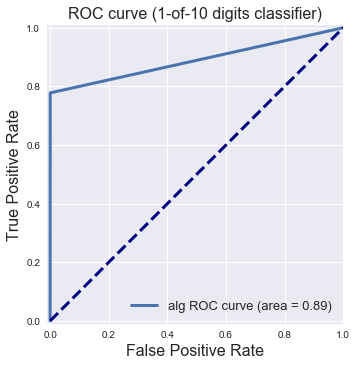

In [10]:
# Running the Logistic regression with C paramter, care about recall and precision in this model because recall will not change 
# c parameter changes
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

rDict = {}
pDict = {}
maxRecall = 0
maxPrecision = 0
for this_C in [0.001, .01, .1, 10, 100]:
    model = LogisticRegression(C=this_C).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('C: ',this_C, classification_report(y_test, y_pred))
    dict1 = {str(this_C): recall_score(y_test, y_pred)}
    dict2 = {str(this_C): precision_score(y_test, y_pred)}
    rDict.update(dict1)
    pDict.update(dict2)
    if rDict[str(this_C)] > maxRecall:
        maxRecall = rDict[str(this_C)]
        if pDict[str(this_C)] > maxPrecision:
            maxPrecision = pDict[str(this_C)]
        for i in rDict:
            for j in pDict:
                if rDict[i] == maxRecall and pDict[j] == maxPrecision:
                    bestC = float(i)
print('Best C Param: ', bestC)
finalLog = LogisticRegression(C= bestC)
finalLog.fit(X_train, y_train)
print('Model Evaluation with Best C: ', '\n', )
evaluation(finalLog, X_test, y_test)
ROC_curve(LogisticRegression(C= bestC),X_train,y_train,X_test, y_test)

In [12]:
#boosting with AdaBoost method on Logistic Regression classifier model

from sklearn.ensemble import AdaBoostClassifier

rDict = {}
pDict = {}
maxRecall = 0
maxPrecision = 0
estimator = range(1,500,10)
learnRate = [.01,.05,.1,.5,1]


for i,j in zip(estimator, learnRate):
    ada_LR = AdaBoostClassifier(
   finalLog, n_estimators= i,
    algorithm="SAMME", learning_rate= j, random_state=42)
    ada_LR.fit(X_train, y_train)
    y_pred = ada_LR.predict(X_test)
    dict1 = {str(i)+(',')+str(j): recall_score(y_test, y_pred)}
    dict2 = {str(i)+(',')+str(j): precision_score(y_test, y_pred)}
    rDict.update(dict1)
    pDict.update(dict2)
    if rDict[str(i)+(',')+str(j)] > maxRecall:
        maxRecall = rDict[str(i)+(',')+str(j)]
        if pDict[str(i)+(',')+str(j)] > maxPrecision:
            maxPrecision = pDict[str(i)+(',')+str(j)]
        for i in rDict:
            for j in pDict:
                if rDict[i] == maxRecall and pDict[j] == maxPrecision:
                    bestParam = i+(',')+j
print('Best Boosting Param: ', bestParam) 

Best Boosting Param:  31,0.5,21,0.1


In [13]:
#Evaluating AdaBoost_LR model
print('Model Evaluation with Best Number of Estimators and Learning Rate: ', '\n', )
ada_LR = AdaBoostClassifier(
   finalLog, n_estimators=31 ,
    algorithm="SAMME", learning_rate=.5 , random_state=42)
ada_LR.fit(X_train, y_train)
evaluation(ada_LR, X_test, y_test)

Model Evaluation with Best Number of Estimators and Learning Rate:  

[[3988    3]
 [   1    8]]
             precision    recall  f1-score   support

      Not 1       1.00      1.00      1.00      3991
          1       0.73      0.89      0.80         9

avg / total       1.00      1.00      1.00      4000



In [14]:
#Running the Decision Tree
model=DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Confusion Matrix\n",confusion_matrix(y_test,y_pred))
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(model.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(model.score(X_test, y_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      3991
          1       0.70      0.78      0.74         9

avg / total       1.00      1.00      1.00      4000

Confusion Matrix
 [[3988    3]
 [   2    7]]
Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 1.00


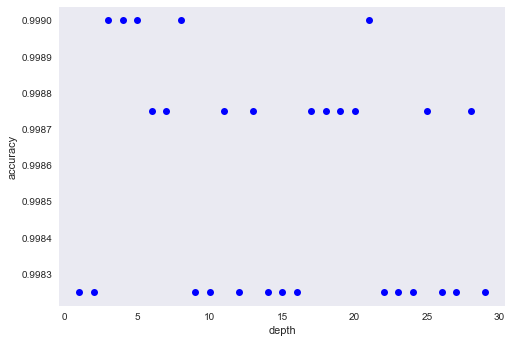

In [15]:
# Creating plot for different depth Vs Accuracy
from sklearn.metrics import accuracy_score
k_range = range(1,30)
s=[]
plt.figure()
for i in k_range:
    model=DecisionTreeClassifier(max_depth = i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    s.append(accuracy_score(y_test, y_pred))
    
plt.plot(k_range, s,'bo')  
plt.xlabel('depth')
plt.grid()
plt.ylabel('accuracy')
plt.show()

Best Tree Depth:  5.0
Model Evaluation with Best Tree Depth:  

[[3987    4]
 [   2    7]]
             precision    recall  f1-score   support

      Not 1       1.00      1.00      1.00      3991
          1       0.64      0.78      0.70         9

avg / total       1.00      1.00      1.00      4000



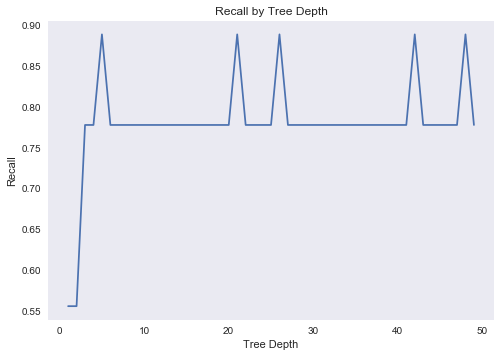

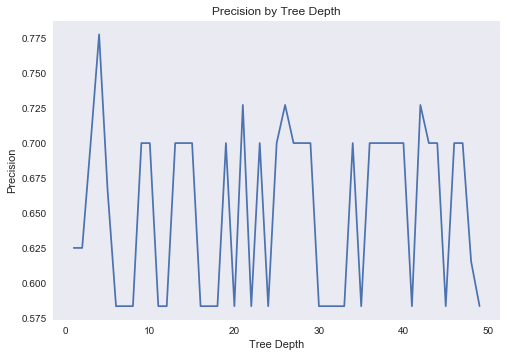

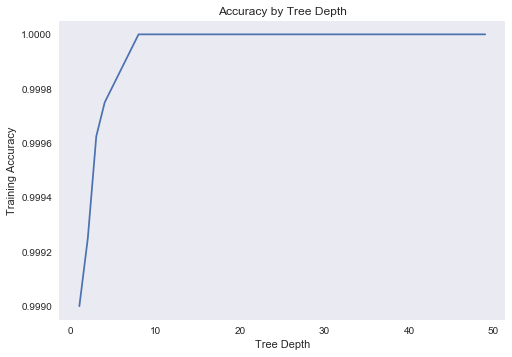

In [32]:
#printing the evaluation metrics for differnt tree depths
rDict= {}
pDict = {}
recallList = []
precisionList = []
trainAcc = []
maxRecall = 0
maxPrecision = 0
for i in range(1,50):
    model=DecisionTreeClassifier(max_depth = i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_TrainPred = model.predict(X_train)
    #print(classification_report(y_test, y_pred))
    #print("Confusion Matrix\n",confusion_matrix(y_test,y_pred))
    dict1 = {str(i): recall_score(y_test, y_pred)}
    dict2 = {str(i): precision_score(y_test, y_pred)}
    rDict.update(dict1)
    pDict.update(dict2)
    recallList = np.append(recallList, recall_score(y_test, y_pred))
    precisionList = np.append(precisionList, precision_score(y_test, y_pred))
    trainAcc = np.append(trainAcc, accuracy_score(y_train, y_TrainPred))
    if rDict[str(i)] > maxRecall:
        maxRecall = rDict[str(i)]
        if pDict[str(i)] > maxPrecision:
            maxPrecision = pDict[str(i)]
        for j in rDict:
            for k in pDict:
                if rDict[j] == maxRecall and pDict[k] == maxPrecision:
                    bestDepth = float(j)
                    
print('Best Tree Depth: ', bestDepth)
finalTree = DecisionTreeClassifier(max_depth = bestDepth)
finalTree.fit(X_train, y_train)
print('Model Evaluation with Best Tree Depth: ', '\n', )
classificationReport = classification_report(y_test, finalTree.predict(X_test), target_names=['Not 1', '1'])
confusion = confusion_matrix(y_test, finalTree.predict(X_test))
print(confusion)
print(classificationReport)

x = range(1,50)
plt.plot(x, recallList) 
plt.xlabel('Tree Depth')
plt.grid()
plt.ylabel('Recall')
plt.title('Recall by Tree Depth')
plt.show()

plt.plot(x, precisionList)
plt.xlabel('Tree Depth')
plt.grid()
plt.ylabel('Precision')
plt.title('Precision by Tree Depth')
plt.show()

plt.plot(x, trainAcc)
plt.xlabel('Tree Depth')
plt.grid()
plt.ylabel('Training Accuracy')
plt.title('Accuracy by Tree Depth')
plt.show()

In [38]:
#comparing grid search decision tree results to former
evaluation = ['accuracy','precision','recall', 'f1','roc_auc']
param_grid = { 
    'max_features': [None],
    'criterion':['gini','entropy'],
    'max_depth':list(range(1,50,5))
}
for j in evaluation:
    clf = DecisionTreeClassifier()
    grid_clf = GridSearchCV(clf, param_grid = param_grid, scoring = j)
    grid_clf.fit(X_train, y_train)
    print('Grid best parameter (max. {0}): {1}'.format(j, grid_clf.best_params_))
    print('Grid best score ({0}): {1}'.format(j, grid_clf.best_score_))

Grid best parameter (max. accuracy): {'criterion': 'entropy', 'max_depth': 6, 'max_features': None}
Grid best score (accuracy): 0.9988125
Grid best parameter (max. precision): {'criterion': 'entropy', 'max_depth': 41, 'max_features': None}
Grid best score (precision): 0.7175868055555555
Grid best parameter (max. recall): {'criterion': 'gini', 'max_depth': 21, 'max_features': None}
Grid best score (recall): 0.7030431818181818
Grid best parameter (max. f1): {'criterion': 'entropy', 'max_depth': 6, 'max_features': None}
Grid best score (f1): 0.7486792320261437
Grid best parameter (max. roc_auc): {'criterion': 'entropy', 'max_depth': 36, 'max_features': None}
Grid best score (roc_auc): 0.8496962585712944


             precision    recall  f1-score   support

          0       1.00      1.00      1.00      3991
          1       0.78      0.78      0.78         9

avg / total       1.00      1.00      1.00      4000

Confusion Matrix
 [[3989    2]
 [   2    7]]
Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 1.00


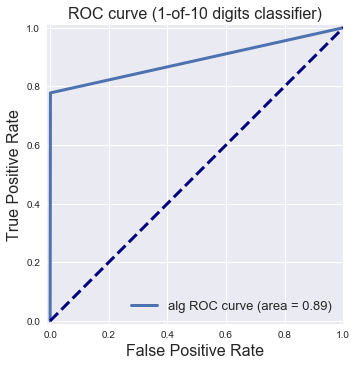

In [35]:
#Setting max decision tree depth to help avoid overfitting, using best depth determined during model tuning, and criterion
# determined from grid search based on recall metric
model=DecisionTreeClassifier(max_depth = bestDepth, criterion = 'gini')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Confusion Matrix\n",confusion_matrix(y_test,y_pred))
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(model.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(model.score(X_test, y_test)))
ROC_curve(model, X_train, y_train, X_test, y_test)

Naive bayes classifier performance: 
 [[3936   55]
 [   1    8]]
Naive bayes classification report: 
              precision    recall  f1-score   support

      not 1       1.00      0.99      0.99      3991
          1       0.13      0.89      0.22         9

avg / total       1.00      0.99      0.99      4000



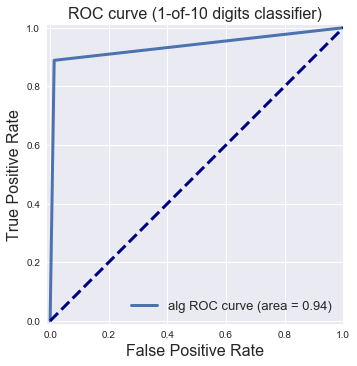

In [17]:
#Naive Bayes model
from sklearn.naive_bayes import GaussianNB

nbclf = GaussianNB().fit(X_train, y_train)
y_scores = nbclf.predict(X_test)
print('Naive bayes classifier performance: \n', confusion_matrix(y_test, y_scores))
print('Naive bayes classification report: \n', classification_report(y_test, y_scores, target_names = ['not 1', '1']))
ROC_curve(GaussianNB(), X_train, y_train, X_test, y_test)

In [57]:
#AdaBoosted Naive Bayes
nbclf = GaussianNB()
rDict = {}
pDict = {}
maxRecall = 0
maxPrecision = 0
estimator = range(1,500,10)
learnRate = [.01,.05,.1,.5,1]


for i,j in zip(estimator, learnRate):
    ada_nb = AdaBoostClassifier( nbclf, n_estimators= i,
    algorithm="SAMME", learning_rate= j, random_state=42)
    ada_nb.fit(X_train, y_train)
    y_pred = ada_nb.predict(X_test)
    dict1 = {str(i)+(',')+str(j): recall_score(y_test, y_pred)}
    dict2 = {str(i)+(',')+str(j): precision_score(y_test, y_pred)}
    rDict.update(dict1)
    pDict.update(dict2)
    if rDict[str(i)+(',')+str(j)] > maxRecall:
        maxRecall = rDict[str(i)+(',')+str(j)]
        if pDict[str(i)+(',')+str(j)] > maxPrecision:
            maxPrecision = pDict[str(i)+(',')+str(j)]
        for i in rDict:
            for j in pDict:
                if rDict[i] == maxRecall and pDict[j] == maxPrecision:
                    bestParam = i+(',')+j
print('Best Boosting Param: ', bestParam) 

Best Boosting Param:  1,0.01,1,0.01


In [59]:
#Final AdaBoost Model Predictions with NB
print('Model Evaluation with Best Number of Estimators and Learning Rate: ', '\n', )
ada_nb = AdaBoostClassifier(
   nbclf, n_estimators=1 ,
    algorithm="SAMME", learning_rate=.01 , random_state=42)
ada_nb.fit(X_train, y_train)
evaluation(ada_nb, X_test, y_test)

Model Evaluation with Best Number of Estimators and Learning Rate:  

[[3936   55]
 [   1    8]]
             precision    recall  f1-score   support

      Not 1       1.00      0.99      0.99      3991
          1       0.13      0.89      0.22         9

avg / total       1.00      0.99      0.99      4000



C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably me

C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably me

C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably me

C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably me

C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably me

C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Grid best parameter (max. accuracy): {'criterion': 'entropy', 'max_depth': 11, 'max_features': None, 'n_estimators': 10}
Grid best score (accuracy): 0.9991875


C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably me

C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably me

C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably me

C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably me

C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably me

Grid best parameter (max. precision): {'criterion': 'entropy', 'max_depth': 36, 'max_features': None, 'n_estimators': 10}
Grid best score (precision): 0.916671875


C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably me

C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably me

C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably me

C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably me

C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably me

C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Grid best parameter (max. recall): {'criterion': 'entropy', 'max_depth': 6, 'max_features': None, 'n_estimators': 10}
Grid best score (recall): 0.7030431818181819


C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably me

C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably me

C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably me

C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably me

C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably me

C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably me

Grid best parameter (max. f1): {'criterion': 'entropy', 'max_depth': 31, 'max_features': None, 'n_estimators': 40}
Grid best score (f1): 0.7290172964113181


C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably me

C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably me

C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably me

C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably me

C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably me

C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably me

Grid best parameter (max. roc_auc): {'criterion': 'entropy', 'max_depth': 1, 'max_features': None, 'n_estimators': 30}
Grid best score (roc_auc): 0.9326187966991445


C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


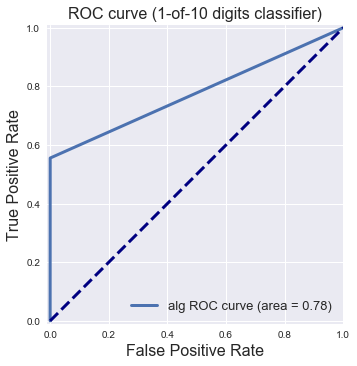

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=-1, oob_score = True) 
evaluation = ['accuracy','precision','recall', 'f1','roc_auc']
param_grid = { 
    'n_estimators': list(range(10,50,10)),
    'max_features': [None],
    'criterion':['gini','entropy'],
    'max_depth':list(range(1,50,5))
}
for j in evaluation:
    rfc = RandomForestClassifier(n_jobs=-1, oob_score = True)
    grid_clf = GridSearchCV(rfc, param_grid = param_grid, scoring = j)
    grid_clf.fit(X_train, y_train)
    print('Grid best parameter (max. {0}): {1}'.format(j, grid_clf.best_params_))
    print('Grid best score ({0}): {1}'.format(j, grid_clf.best_score_))

ROC_curve(rfc, X_train, y_train, X_test, y_test)

Model Evaluation with Best Number of Trees, Tree Depth, and Information Criteria:  

[[3990    1]
 [   3    6]]
             precision    recall  f1-score   support

      Not 1       1.00      1.00      1.00      3991
          1       0.86      0.67      0.75         9

avg / total       1.00      1.00      1.00      4000



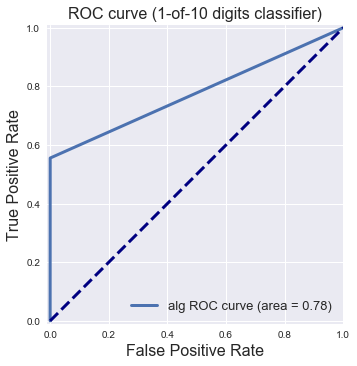

In [43]:
#Best Random Forest Model Used on Test Data - Best Metric for Overall Performance is Recall in this Case
print('Model Evaluation with Best Number of Trees, Tree Depth, and Information Criteria: ', '\n', )
rfc = RandomForestClassifier(n_jobs=-1, oob_score = False, n_estimators = 10, max_depth=6, criterion = 'entropy' )
rfc.fit(X_train, y_train)
evaluation(rfc, X_test, y_test)
ROC_curve(rfc, X_train, y_train, X_test, y_test)

In [58]:
#AdaBoost on Random Forest Model
rfc = RandomForestClassifier(criterion = 'entropy', max_depth = 6, n_estimators = 10, random_state=42)
rDict = {}
pDict = {}
maxRecall = 0
maxPrecision = 0
estimator = range(1,500,10)
learnRate = [.01,.05,.1,.5,1]


for i,j in zip(estimator, learnRate):
    ada_rfc = AdaBoostClassifier( rfc, n_estimators= i,
    algorithm="SAMME", learning_rate= j, random_state=42)
    ada_rfc.fit(X_train, y_train)
    y_pred = ada_rfc.predict(X_test)
    dict1 = {str(i)+(',')+str(j): recall_score(y_test, y_pred)}
    dict2 = {str(i)+(',')+str(j): precision_score(y_test, y_pred)}
    rDict.update(dict1)
    pDict.update(dict2)
    if rDict[str(i)+(',')+str(j)] > maxRecall:
        maxRecall = rDict[str(i)+(',')+str(j)]
        if pDict[str(i)+(',')+str(j)] > maxPrecision:
            maxPrecision = pDict[str(i)+(',')+str(j)]
        for i in rDict:
            for j in pDict:
                if rDict[i] == maxRecall and pDict[j] == maxPrecision:
                    bestParam = i+(',')+j
print('Best Boosting Param: ', bestParam) 

Best Boosting Param:  1,0.01,1,0.01


In [75]:
#Final AdaBoost Model Predictions with RF
print('Model Evaluation with Best Number of Estimators and Learning Rate: ', '\n', )
ada_rfc = AdaBoostClassifier(
   rfc, n_estimators=1 ,
    algorithm="SAMME", learning_rate=.01 , random_state=42)
ada_rfc.fit(X_train, y_train)
evaluation(ada_rfc, X_test, y_test)

Model Evaluation with Best Number of Estimators and Learning Rate:  

[[3989    2]
 [   2    7]]
             precision    recall  f1-score   support

      Not 1       1.00      1.00      1.00      3991
          1       0.78      0.78      0.78         9

avg / total       1.00      1.00      1.00      4000



LogisticRegression Accuracy: 0.99925 Recall: 0.777777777778 Precision:  0.875
RandomForestClassifier Accuracy: 0.999 Recall: 0.666666666667 Precision:  0.857142857143
SVC Accuracy: 0.9985 Recall: 0.666666666667 Precision:  0.666666666667
DecisionTreeClassifier Accuracy: 0.999 Recall: 0.777777777778 Precision:  0.777777777778
KNeighborsClassifier Accuracy: 0.999 Recall: 0.777777777778 Precision:  0.777777777778
GaussianNB Accuracy: 0.986 Recall: 0.888888888889 Precision:  0.126984126984
VotingClassifier Accuracy: 0.99875 Recall: 0.666666666667 Precision:  0.75
Voting Classifier Overall Performance: 
             precision    recall  f1-score   support

      Not 1       1.00      1.00      1.00      3991
          1       0.75      0.67      0.71         9

avg / total       1.00      1.00      1.00      4000

[[3989    2]
 [   3    6]]


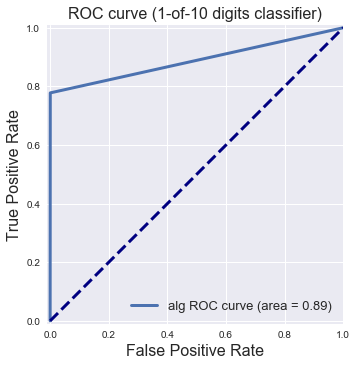

In [60]:
#Ensemble voting methods using hard and soft voting classifiers

#Hard voting
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(C = bestC, random_state=42)
rnd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 6, n_estimators = 10, random_state=42)
svm_clf = SVC(C = .1, gamma = .0001, kernel ='linear', random_state=42)
tree_clf = DecisionTreeClassifier(max_depth = bestDepth, criterion = 'gini')
knn_clf = KNeighborsClassifier(n_neighbors = 3)
nb_clf = GaussianNB()

voting_clf = VotingClassifier(estimators=[('nb', nb_clf),('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf), ('knn', knn_clf), ('dt', tree_clf)], voting='hard')
voting_clf.fit(X_train, y_train)



for clf in (log_clf, rnd_clf, svm_clf,tree_clf,knn_clf,nb_clf,voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__,'Accuracy:', accuracy_score(y_test, y_pred),'Recall:', recall_score(y_test, y_pred),'Precision: ', 
          precision_score(y_test, y_pred))
    
print('Voting Classifier Overall Performance: ')    
print(classification_report(y_test, voting_clf.predict(X_test), target_names=['Not 1', '1']))
print(confusion_matrix(y_test, voting_clf.predict(X_test)))
ROC_curve(voting_clf, X_train, y_train, X_test, y_test)

LogisticRegression Accuracy: 0.99925 Recall: 0.777777777778 Precision:  0.875
RandomForestClassifier Accuracy: 0.999 Recall: 0.666666666667 Precision:  0.857142857143
SVC Accuracy: 0.9985 Recall: 0.666666666667 Precision:  0.666666666667
DecisionTreeClassifier Accuracy: 0.99925 Recall: 0.888888888889 Precision:  0.8
KNeighborsClassifier Accuracy: 0.999 Recall: 0.777777777778 Precision:  0.777777777778
GaussianNB Accuracy: 0.986 Recall: 0.888888888889 Precision:  0.126984126984
VotingClassifier Accuracy: 0.999 Recall: 0.777777777778 Precision:  0.777777777778
Voting Classifier Overall Performance: 
[[3989    2]
 [   2    7]]
             precision    recall  f1-score   support

      Not 1       1.00      1.00      1.00      3991
          1       0.78      0.78      0.78         9

avg / total       1.00      1.00      1.00      4000



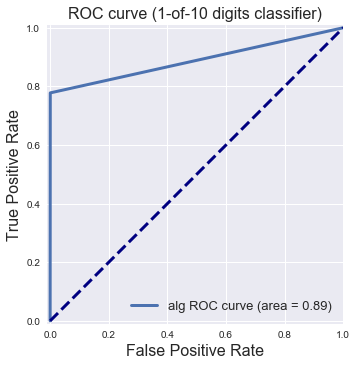

In [61]:
#Soft voting

log_clf = LogisticRegression(C = bestC, random_state=42)
rnd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 6, n_estimators = 10, random_state=42)
svm_clf = SVC(C = .1, gamma = .0001, kernel ='linear', random_state=42, probability = True)
tree_clf = DecisionTreeClassifier(max_depth = bestDepth, criterion = 'gini')
knn_clf = KNeighborsClassifier(n_neighbors = 3)
nb_clf = GaussianNB()

voting_s = VotingClassifier(estimators=[('nb', nb_clf), ('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf), ('knn', knn_clf), 
                                          ('dt', tree_clf)], voting='soft')
voting_s.fit(X_train, y_train)



for clf in (log_clf, rnd_clf, svm_clf,tree_clf,knn_clf,nb_clf,voting_s):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__,'Accuracy:', accuracy_score(y_test, y_pred),'Recall:', recall_score(y_test, y_pred),'Precision: ', 
          precision_score(y_test, y_pred))
    
print('Voting Classifier Overall Performance: ')    
evaluation(voting_s, X_test, y_test)
ROC_curve(voting_s, X_train, y_train, X_test, y_test)

In [77]:
#Voting with Two Best AdaBoost Models

ada_LR = AdaBoostClassifier(
   finalLog, n_estimators=31 ,
    algorithm="SAMME", learning_rate=.5 , random_state=42)
ada_SVC = AdaBoostClassifier(
   supportVectorModel, n_estimators= 41,
    algorithm="SAMME", learning_rate= 1, random_state=42)


voting_s2 = VotingClassifier(estimators=[ ('lr', ada_LR), ('svc', ada_SVC)], voting='soft')
voting_s.fit(X_train, y_train)



for clf in (ada_LR, ada_SVC, voting_s):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__,'Accuracy:', accuracy_score(y_test, y_pred),'Recall:', recall_score(y_test, y_pred),'Precision: ', 
          precision_score(y_test, y_pred))
    
print('Voting Classifier Overall Performance: ')    
evaluation(voting_s, X_test, y_test)
ROC_curve(voting_s, X_train, y_train, X_test, y_test)


AdaBoostClassifier Accuracy: 0.999 Recall: 0.888888888889 Precision:  0.727272727273


KeyboardInterrupt: 

In [ ]:
#Try to get better fits using bagging and pasting on all models

from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import f1_score

models = {'DT':DecisionTreeClassifier(max_depth=bestDepth, random_state=42), 
          'KNN':KNeighborsClassifier(n_neighbors = 1),
          'LR': LogisticRegression(C=bestC, random_state=42),
          'SVC': SVC(C = .1, gamma = .0001, kernel ='linear', random_state=42),
          'RF': RandomForestClassifier(criterion = 'entropy', max_depth = 6, n_estimators = 10, random_state=42),
          'NB': GaussianNB()
         }
bootstrap = [True, False]
estimators = range(1,100)
acc = []
f1 = []
maxAcc = 0
maxF1 = 0

for i in models:
    for j in bootstrap:
        for k in estimators: 
            bagModel = BaggingClassifier(models[i], n_estimators=k, max_samples=5000, bootstrap=j, n_jobs=-1, random_state=42)
            bagModel.fit(X_train, y_train)
            yPred = bagModel.predict(X_test)
            acc = np.append(acc, accuracy_score(y_test, yPred))
            f1 = np. append(f1, f1_score(y_test, yPred))
            for n,r in zip(acc, f1):
                if n > maxAcc and r > maxF1:
                    maxAcc = n
                    maxF1 = r
                    bagParam = str(i)+(',')+str(j)+(',')+str(k)

In [ ]:
bagParam

DT with Bagging Performance: 
[[3989    2]
 [   2    7]]
             precision    recall  f1-score   support

      Not 1       1.00      1.00      1.00      3991
          1       0.78      0.78      0.78         9

avg / total       1.00      1.00      1.00      4000



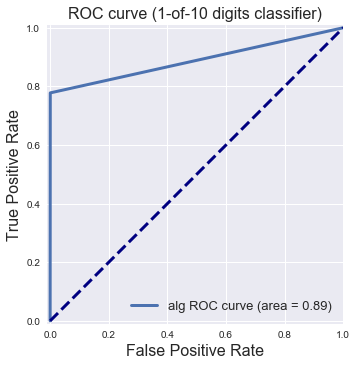

In [78]:
#Best model with bagging or pasting classifier is the support vector classifier
bagModel = BaggingClassifier(SVC(C = .1, gamma = .0001, kernel ='linear', random_state=42), n_estimators=3, max_samples=5000, bootstrap=True, n_jobs=-1, random_state=42)
bagModel.fit(X_train, y_train)
yPred = bagModel.predict(X_test)
print('SVC with Bagging Performance: ')    
evaluation(bagModel, X_test, y_test)
ROC_curve(bagModel, X_train, y_train, X_test, y_test)

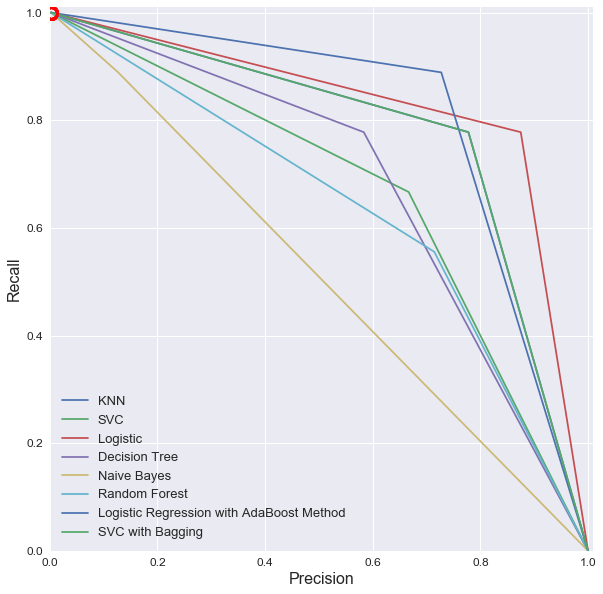

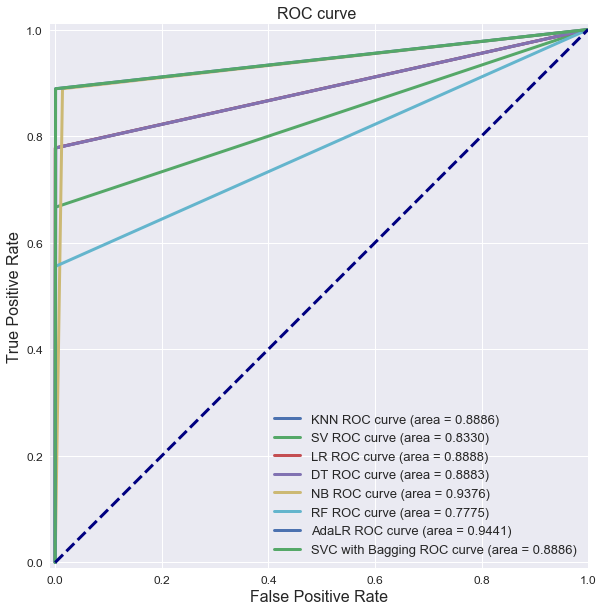

In [114]:
#ROC and Precision-Recall Model Comparisons
KNN = KNeighborsClassifier(n_neighbors = 3).fit(X_train,y_train)
precision_KNN, recall_KNN, thresholds_KNN = precision_recall_curve(y_test, KNN.predict(X_test))
closest_zero_KNN = np.argmin(np.abs(thresholds_KNN))
closest_zero_p_KNN = precision[closest_zero_KNN]
closest_zero_r_KNN = recall[closest_zero_KNN]
fpr_KNN, tpr_KNN, _ = roc_curve(y_test, KNN.predict(X_test))
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)


SV = SVC(C = .1, gamma = .0001, kernel ='linear').fit(X_train,y_train)
precision_SV, recall_SV, thresholds_SV = precision_recall_curve(y_test, SV.predict(X_test))
closest_zero_SV = np.argmin(np.abs(thresholds_SV))
closest_zero_p_SV = precision[closest_zero_SV]
closest_zero_r_SV = recall[closest_zero_SV]
fpr_SV, tpr_SV, _ = roc_curve(y_test, SV.predict(X_test))
roc_auc_SV = auc(fpr_SV, tpr_SV)

LR = LogisticRegression(C = bestC).fit(X_train,y_train)
precision_LR, recall_LR, thresholds_LR = precision_recall_curve(y_test, LR.predict(X_test))
closest_zero_LR = np.argmin(np.abs(thresholds_LR))
closest_zero_p_LR = precision[closest_zero_LR]
closest_zero_r_LR = recall[closest_zero_LR]
fpr_LR, tpr_LR, _ = roc_curve(y_test, LR.predict(X_test))
roc_auc_LR = auc(fpr_LR, tpr_LR)

DT = DecisionTreeClassifier(criterion= 'gini', max_depth= bestDepth, max_features=None ).fit(X_train,y_train)
precision_DT, recall_DT, thresholds_DT = precision_recall_curve(y_test, DT.predict(X_test))
closest_zero_DT = np.argmin(np.abs(thresholds_DT))
closest_zero_p_DT = precision[closest_zero_DT]
closest_zero_r_DT = recall[closest_zero_DT]
fpr_DT, tpr_DT, _ = roc_curve(y_test, DT.predict(X_test))
roc_auc_DT = auc(fpr_DT, tpr_DT)

NB =  GaussianNB().fit(X_train,y_train)
precision_NB, recall_NB, thresholds_NB = precision_recall_curve(y_test, NB.predict(X_test))
closest_zero_NB = np.argmin(np.abs(thresholds_NB))
closest_zero_p_NB = precision[closest_zero_NB]
closest_zero_r_NB = recall[closest_zero_NB]
fpr_NB, tpr_NB, _ = roc_curve(y_test, NB.predict(X_test))
roc_auc_NB = auc(fpr_NB, tpr_NB)

RF =  RandomForestClassifier(criterion= 'entropy', max_depth=6, max_features=None ,n_estimators=20).fit(X_train,y_train)
precision_RF, recall_RF, thresholds_RF = precision_recall_curve(y_test, RF.predict(X_test))
closest_zero_RF = np.argmin(np.abs(thresholds_RF))
closest_zero_p_RF = precision[closest_zero_RF]
closest_zero_r_RF = recall[closest_zero_RF]
fpr_RF, tpr_RF, _ = roc_curve(y_test, RF.predict(X_test))
roc_auc_RF = auc(fpr_RF, tpr_RF)

ada_LR = AdaBoostClassifier(finalLog, n_estimators=31 ,algorithm="SAMME", learning_rate=.5 , random_state=42)
ada_LR.fit(X_train, y_train)
precision_adaLR, recall_adaLR, thresholds_adaLR = precision_recall_curve(y_test, ada_LR.predict(X_test))
closest_zero_adaLR = np.argmin(np.abs(thresholds_adaLR))
closest_zero_p_adaLR = precision[closest_zero_adaLR]
closest_zero_r_adaLR = recall[closest_zero_adaLR]
fpr_adaLR, tpr_adaLR, _ = roc_curve(y_test, ada_LR.predict(X_test))
roc_auc_adaLR = auc(fpr_adaLR, tpr_adaLR)

bagModel = BaggingClassifier(SVC(C = .1, gamma = .0001, kernel ='linear', random_state=42), n_estimators=100, max_samples=5000, bootstrap=True, n_jobs=-1, random_state=42)
bagModel.fit(X_train, y_train)
precision_bag, recall_bag, thresholds_bag = precision_recall_curve(y_test, bagModel.predict(X_test))
closest_zero_bag = np.argmin(np.abs(thresholds_bag))
closest_zero_p_bag = precision[closest_zero_bag]
closest_zero_r_bag = recall[closest_zero_bag]
fpr_bag, tpr_bag, _ = roc_curve(y_test, bagModel.predict(X_test))
roc_auc_bag = auc(fpr_bag, tpr_bag)


#Prcision Recall Curve        
plt.figure(figsize=(10,10))
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
#plt.title ("Precision-recall curve:  class_weight = 'balanced'")
plt.plot(precision_KNN, recall_KNN, label = 'KNN')
plt.plot(closest_zero_p_KNN, closest_zero_r_KNN, 'o', markersize=12, fillstyle='none', c='r', mew=3)
plt.plot(precision_SV, recall_SV, label = 'SVC')
plt.plot(closest_zero_p_SV, closest_zero_r_SV, 'o', markersize=12, fillstyle='none', c='r', mew=3)
plt.plot(precision_LR, recall_LR, label = 'Logistic')
plt.plot(closest_zero_p_LR, closest_zero_r_LR, 'o', markersize=12, fillstyle='none', c='r', mew=3)
plt.plot(precision_DT, recall_DT, label = 'Decision Tree')
plt.plot(closest_zero_p_DT, closest_zero_r_DT, 'o', markersize=12, fillstyle='none', c='r', mew=3)
plt.plot(precision_NB, recall_NB, label = 'Naive Bayes')
plt.plot(closest_zero_p_NB, closest_zero_r_NB, 'o', markersize=12, fillstyle='none', c='r', mew=3)
plt.plot(precision_RF, recall_RF, label = 'Random Forest')
plt.plot(closest_zero_p_RF, closest_zero_r_RF, 'o', markersize=12, fillstyle='none', c='r', mew=3)
plt.plot(precision_adaLR, recall_adaLR, label = 'Logistic Regression with AdaBoost Method')
plt.plot(closest_zero_p_adaLR, closest_zero_r_adaLR, 'o', markersize=12, fillstyle='none', c='r', mew=3)
plt.plot(precision_bag, recall_bag, label = 'SVC with Bagging')
plt.plot(closest_zero_p_bag, closest_zero_r_bag, 'o', markersize=12, fillstyle='none', c='r', mew=3)
plt.legend(loc='lower left', fontsize=13)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

#Roc Curve
plt.figure(figsize=(10,10))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_KNN, tpr_KNN, lw=3, label='KNN ROC curve (area = {:0.4f})'.format(roc_auc_KNN))
plt.plot(fpr_SV, tpr_SV, lw=3, label='SV ROC curve (area = {:0.4f})'.format(roc_auc_SV))
plt.plot(fpr_LR, tpr_LR, lw=3, label='LR ROC curve (area = {:0.4f})'.format(roc_auc_LR))
plt.plot(fpr_DT, tpr_DT, lw=3, label='DT ROC curve (area = {:0.4f})'.format(roc_auc_DT))
plt.plot(fpr_NB, tpr_NB, lw=3, label='NB ROC curve (area = {:0.4f})'.format(roc_auc_NB))
plt.plot(fpr_RF, tpr_RF, lw=3, label='RF ROC curve (area = {:0.4f})'.format(roc_auc_RF))
plt.plot(fpr_adaLR, tpr_adaLR, lw=3, label='AdaLR ROC curve (area = {:0.4f})'.format(roc_auc_adaLR))
plt.plot(fpr_adaLR, tpr_adaLR, lw=3, label='SVC with Bagging ROC curve (area = {:0.4f})'.format(roc_auc_bag))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve ', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show() 

Model Evaluation with Best Number of Estimators and Learning Rate:  

[[3988    3]
 [   1    8]]
             precision    recall  f1-score   support

      Not 1       1.00      1.00      1.00      3991
          1       0.73      0.89      0.80         9

avg / total       1.00      1.00      1.00      4000



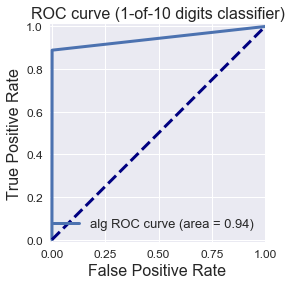

In [112]:
#Final Model with best classification ability: Logistic Regression with AdaBoosting and Voting Classifier Ensemble with Soft
#voting
print('Model Evaluation with Best Number of Estimators and Learning Rate: ', '\n', )
ada_LR = AdaBoostClassifier(
   finalLog, n_estimators=31 ,
    algorithm="SAMME", learning_rate=.5 , random_state=42)
ada_LR.fit(X_train, y_train)
evaluation(ada_LR, X_test, y_test)
ROC_curve(ada_LR, X_train, y_train, X_test,y_test)

Voting Classifier Overall Performance: 
[[3989    2]
 [   2    7]]
             precision    recall  f1-score   support

      Not 1       1.00      1.00      1.00      3991
          1       0.78      0.78      0.78         9

avg / total       1.00      1.00      1.00      4000



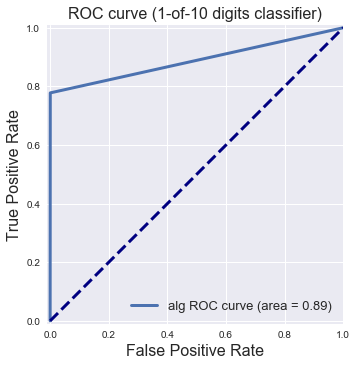

In [30]:
print('Voting Classifier Overall Performance: ')    
evaluation(voting_s, X_test, y_test)
ROC_curve(voting_s, X_train, y_train, X_test, y_test)

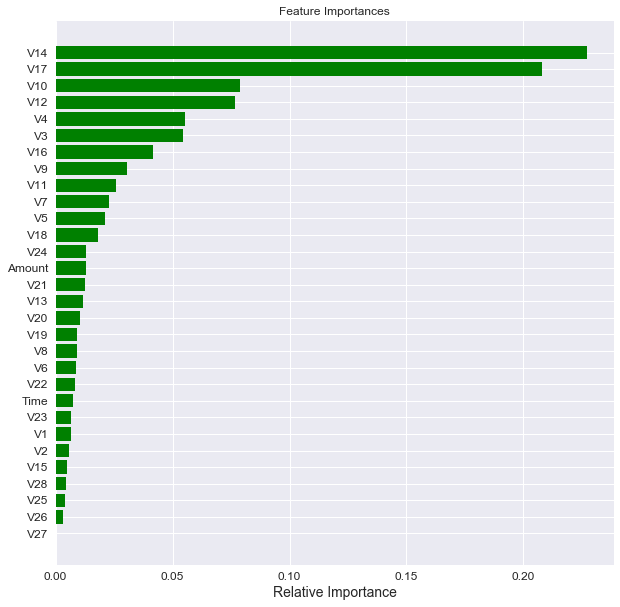

In [92]:
#Evaluating Feature Performance Using Random Forest Model
features = X_train.columns
rfc.fit(X_train, y_train)

importances = rfc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'g', align = 'center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

#Code for feature plot found at https://www.agcross.com/2015/02/random-forests-in-python-with-scikit-learn/

In [47]:
#Using only features with .05 or greater relative feature importance for next model
X_train = X_train[['V14', 'V17', 'V10', 'V12', 'V4','V3']]
X_test = X_test[['V14', 'V17', 'V10', 'V12', 'V4','V3']]

In [48]:
#Gradient boosting using most important features from random forest model feature importances
from sklearn.ensemble import GradientBoostingClassifier

rDict = {}
pDict = {}
maxRecall = 0
maxPrecision = 0
estimator = range(1,100,10)
learnRate = [.01,.05,.1,.5,1]


for i,j in zip(estimator, learnRate):
    gbct = GradientBoostingClassifier(max_depth= bestDepth, n_estimators= i, learning_rate= j, random_state=42)
    gbct.fit(X_train, y_train)
    y_pred = gbct.predict(X_test)
    dict1 = {str(i)+(',')+str(j): recall_score(y_test, y_pred)}
    dict2 = {str(i)+(',')+str(j): precision_score(y_test, y_pred)}
    rDict.update(dict1)
    pDict.update(dict2)
    if rDict[str(i)+(',')+str(j)] > maxRecall:
        maxRecall = rDict[str(i)+(',')+str(j)]
        if pDict[str(i)+(',')+str(j)] > maxPrecision:
            maxPrecision = pDict[str(i)+(',')+str(j)]
        for i in rDict:
            for j in pDict:
                if rDict[i] == maxRecall and pDict[j] == maxPrecision:
                    bestParam = ('Max Recall: ')+i+(',')+(' Max Precision: ')+j
print('Best Boosting Param: ', bestParam) 

C:\Users\Lacey\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Best Boosting Param:  Max Recall: 11,0.05, Max Precision: 11,0.05


Prediction Evaluation for Gradient Boosting Classifier: 
[[3989    2]
 [   2    7]]
             precision    recall  f1-score   support

      Not 1       1.00      1.00      1.00      3991
          1       0.78      0.78      0.78         9

avg / total       1.00      1.00      1.00      4000



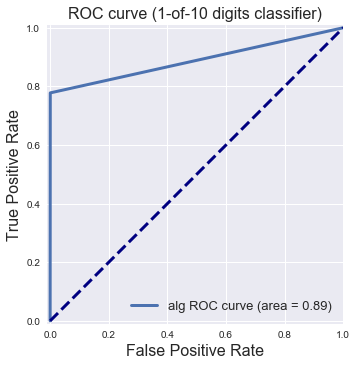

In [49]:
#Final/best gradient boosting model with feature selection
gbct = GradientBoostingClassifier(max_depth= bestDepth, n_estimators= 11, learning_rate= .05, random_state=42)
gbct.fit(X_train, y_train)
print("Prediction Evaluation for Gradient Boosting Classifier: ")
evaluation(gbct, X_test, y_test)
ROC_curve(gbct, X_train, y_train, X_test, y_test)

In [ ]:
#Dimensionality Reduction Techniques - tried fitted dataset to train previous models and does not work 
#Data is composed of the principal components from a PCA, this is like doing dimension reduction twice
from sklearn import manifold
from sklearn.neighbors import NearestNeighbors
clf = manifold.LocallyLinearEmbedding(n_components=2,
                                      method='standard')
X_train = clf.fit_transform(X_train)
X_test = clf.fit_transform(X_test)